In [11]:
import pandas as pd

# Import dataset using pandas
pd.read_csv('gwas_trimmed.tsv', sep='\t', nrows=100)

,Unnamed: 0,SNPS,REGION,CHR_POS,P_VALUE,RISK_ALLELE_FREQUENCY
0,1,rs1538171,6q22.32,126431738,7.000000e-10,0.45
1,2,rs4320356,6p22.2,26423332,3.000000e-08,0.28
2,3,rs1770,6p21.32,32660056,2.000000e-232,0.46
3,4,rs2647044,6p21.32,32700133,1.000000e-16,0.13
4,5,rs11755527,6q15,90248512,5.000000e-08,NR
5,6,rs9388489,6q22.32,126377573,4.000000e-13,0.45
6,7,rs9268645,6p21.32,32440750,1.000000e-100,NR
7,9,rs9272346,6p21.32,32636595,6.000000e-129,NR
8,11,rs3757247,6q15,90247744,1.000000e-06,NR
9,13,rs924043,6q27,170063801,8.000000e-09,0.85


In [12]:
# Make the table readable using pandas

df= pd.read_csv('gwas_trimmed.tsv', sep='\t')
df

,Unnamed: 0,SNPS,REGION,CHR_POS,P_VALUE,RISK_ALLELE_FREQUENCY
0,1,rs1538171,6q22.32,126431738,7.000000e-10,0.45
1,2,rs4320356,6p22.2,26423332,3.000000e-08,0.28
2,3,rs1770,6p21.32,32660056,2.000000e-232,0.46
3,4,rs2647044,6p21.32,32700133,1.000000e-16,0.13
4,5,rs11755527,6q15,90248512,5.000000e-08,NR
5,6,rs9388489,6q22.32,126377573,4.000000e-13,0.45
6,7,rs9268645,6p21.32,32440750,1.000000e-100,NR
7,9,rs9272346,6p21.32,32636595,6.000000e-129,NR
8,11,rs3757247,6q15,90247744,1.000000e-06,NR
9,13,rs924043,6q27,170063801,8.000000e-09,0.85


In [13]:
import numpy as np

# Minus log the p-values and add new column to the table
df['-logp']= - np.log(df['P_VALUE'])
df

,Unnamed: 0,SNPS,REGION,CHR_POS,P_VALUE,RISK_ALLELE_FREQUENCY,-logp
0,1,rs1538171,6q22.32,126431738,7.000000e-10,0.45,21.079941
1,2,rs4320356,6p22.2,26423332,3.000000e-08,0.28,17.322068
2,3,rs1770,6p21.32,32660056,2.000000e-232,0.46,533.506594
3,4,rs2647044,6p21.32,32700133,1.000000e-16,0.13,36.841361
4,5,rs11755527,6q15,90248512,5.000000e-08,NR,16.811243
5,6,rs9388489,6q22.32,126377573,4.000000e-13,0.45,28.547312
6,7,rs9268645,6p21.32,32440750,1.000000e-100,NR,230.258509
7,9,rs9272346,6p21.32,32636595,6.000000e-129,NR,295.241718
8,11,rs3757247,6q15,90247744,1.000000e-06,NR,13.815511
9,13,rs924043,6q27,170063801,8.000000e-09,0.85,18.643824


In [14]:
# Group the 'regions' together, this will later be chromosome
for region, group_df in df.groupby('REGION'):
    print(region)

6p21.32
6p22.2
6p25.3
6q15
6q22.32
6q23.3
6q25.3
6q27


In [15]:
# Put variants in order by max cumulative position in chromosome
running_pos = 0

cumulative_pos = []

for region, group_df in df.groupby('REGION'):
    cumulative_pos.append(group_df['CHR_POS'] + running_pos)
    running_pos+= group_df['CHR_POS'].max()

cumulative_pos

[2     32660056
 3     32700133
 6     32440750
 7     32636595
 16    32658495
 18    32516743
 19    32658661
 Name: CHR_POS, dtype: int64,
 1    59123465
 Name: CHR_POS, dtype: int64,
 10    59533882
 11    59548380
 Name: CHR_POS, dtype: int64,
 4     149796892
 8     149796124
 14    149815429
 20    149703531
 Name: CHR_POS, dtype: int64,
 0     276247167
 5     276193002
 15    276168637
 17    276206530
 Name: CHR_POS, dtype: int64,
 12    413929635
 Name: CHR_POS, dtype: int64,
 13    572978845
 Name: CHR_POS, dtype: int64,
 9    743042646
 Name: CHR_POS, dtype: int64]

In [16]:
# Position of variant relative to whole chromosome

df['cumulative_pos'] = pd.concat(cumulative_pos)
df

,Unnamed: 0,SNPS,REGION,CHR_POS,P_VALUE,RISK_ALLELE_FREQUENCY,-logp,cumulative_pos
0,1,rs1538171,6q22.32,126431738,7.000000e-10,0.45,21.079941,276247167
1,2,rs4320356,6p22.2,26423332,3.000000e-08,0.28,17.322068,59123465
2,3,rs1770,6p21.32,32660056,2.000000e-232,0.46,533.506594,32660056
3,4,rs2647044,6p21.32,32700133,1.000000e-16,0.13,36.841361,32700133
4,5,rs11755527,6q15,90248512,5.000000e-08,NR,16.811243,149796892
5,6,rs9388489,6q22.32,126377573,4.000000e-13,0.45,28.547312,276193002
6,7,rs9268645,6p21.32,32440750,1.000000e-100,NR,230.258509,32440750
7,9,rs9272346,6p21.32,32636595,6.000000e-129,NR,295.241718,32636595
8,11,rs3757247,6q15,90247744,1.000000e-06,NR,13.815511,149796124
9,13,rs924043,6q27,170063801,8.000000e-09,0.85,18.643824,743042646


In [17]:
# Create SNP number for indexing
df['SNP number']=df.index
df

,Unnamed: 0,SNPS,REGION,CHR_POS,P_VALUE,RISK_ALLELE_FREQUENCY,-logp,cumulative_pos,SNP number
0,1,rs1538171,6q22.32,126431738,7.000000e-10,0.45,21.079941,276247167,0
1,2,rs4320356,6p22.2,26423332,3.000000e-08,0.28,17.322068,59123465,1
2,3,rs1770,6p21.32,32660056,2.000000e-232,0.46,533.506594,32660056,2
3,4,rs2647044,6p21.32,32700133,1.000000e-16,0.13,36.841361,32700133,3
4,5,rs11755527,6q15,90248512,5.000000e-08,NR,16.811243,149796892,4
5,6,rs9388489,6q22.32,126377573,4.000000e-13,0.45,28.547312,276193002,5
6,7,rs9268645,6p21.32,32440750,1.000000e-100,NR,230.258509,32440750,6
7,9,rs9272346,6p21.32,32636595,6.000000e-129,NR,295.241718,32636595,7
8,11,rs3757247,6q15,90247744,1.000000e-06,NR,13.815511,149796124,8
9,13,rs924043,6q27,170063801,8.000000e-09,0.85,18.643824,743042646,9


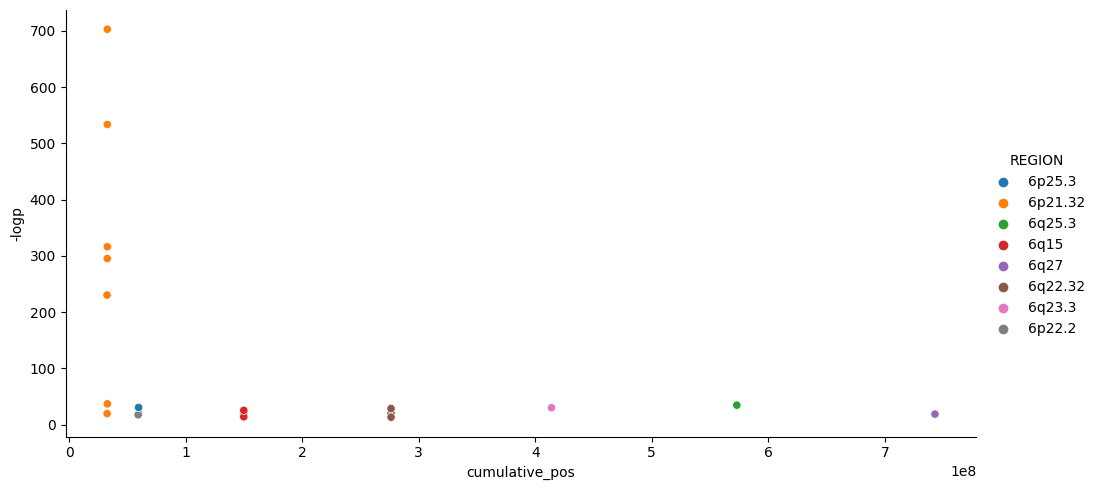

In [18]:
# Create Manhattan plot, this graph is showing regions and not chromosomes, 
# In future the regions column will be replaced by chromosome number
import seaborn as sns
%matplotlib inline

# Manhatton plot for cumulative position vs -logp 
sns.relplot(
    data = df.sample(21), # for whole genome this number will be 10000, or however many you want to see
    x= 'cumulative_pos',
    y= '-logp',
    aspect = 2, # for whole genome this will need to be tweaked to maybe 4
    hue = 'REGION' # for whole genome this will be changed to 'CHR' -chromosome
)

In [19]:
# Create manhatton plot for -logp vs SNP number

#sns.relplot(
#    data = df.sample(21), # for whole genome this number will be 10000, or however many you want to see
#    x= 'SNP number',
#    y= '-logp',
#    aspect = 2, # for whole genome this will need to be tweaked to maybe 4
#    hue = 'REGION') # for whole genome this will be changed to 'CHR' chromosome

Text(0.5, 0.98, 'GWAS Plot showing Association between SNPs in Chr 6 and T1DM')

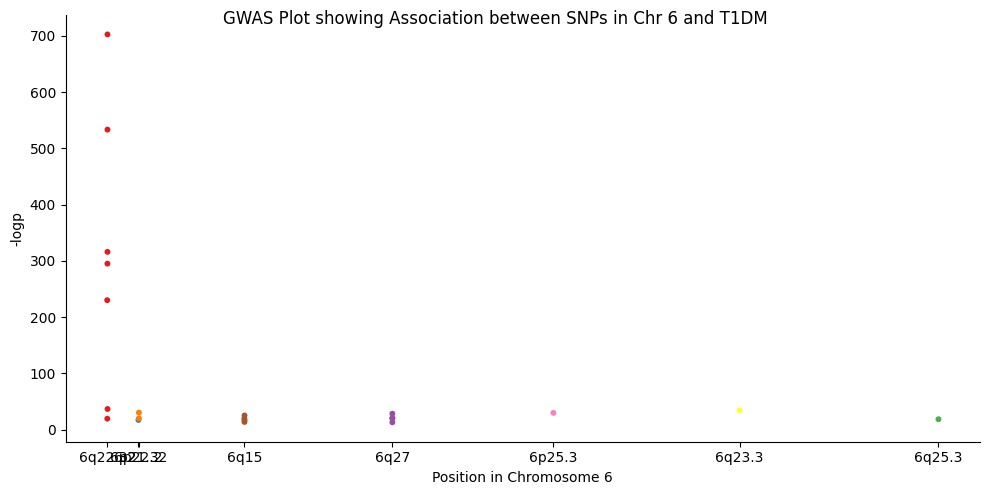

In [23]:
# import adjustText
#from adjustText import adjust_text

#my_data = df.sample(21)

g=sns.relplot(
    data = df.sample(21), # for whole genome this number will be 10000, or however many you want to see
    x= 'cumulative_pos',
    y= '-logp',
    aspect = 2, # for whole genome this will need to be tweaked to maybe 4
    hue = 'REGION', # for whole genome this will be changed to 'CHR' -chromosome
    palette = 'Set1',
    linewidth=0,
    size=4,
    legend=None
)

# Editing x-axis and making it neater
g.ax.set_xlabel('Position in Chromosome 6') #for whole genome this will be 'Chromosome'

# Setting where the labels in the x-axis should be
g.ax.set_xticks(df.groupby('REGION')['cumulative_pos'].median())

g.ax.set_xticklabels(df['REGION'].unique())

# Add title to graph
g.fig.suptitle('GWAS Plot showing Association between SNPs in Chr 6 and T1DM')

# annotations = my_data[my_data['-logp'] > 1].apply(lambda p:g.ax.annotate(p['Markername'],
  #                                                                       (p['cumulative_pos'], p['-logp'])), axis=1).to_list()
                                    
                                